# Installing libraries

In [2]:
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema
from scipy.interpolate import interp1d
import numpy as np

plt.rcParams.update({
'font.size': 11,
'axes.titlesize': 11,
'axes.labelsize': 11,
'xtick.labelsize': 10,
'ytick.labelsize': 10,
'legend.fontsize': 10,
'figure.titlesize': 11,
'figure.dpi' : 200 })

# Nyquist frequency

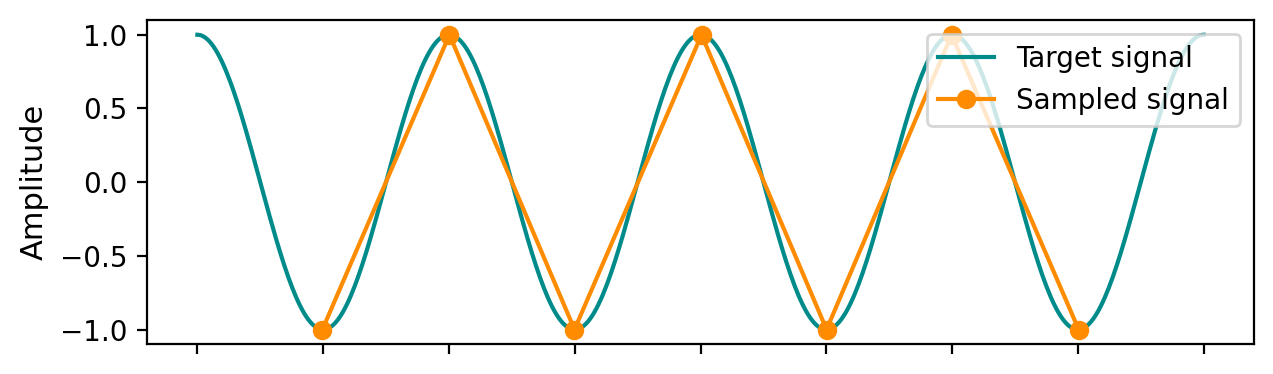

In [3]:
# Create time arrays
t_target= np.linspace(0, 2, 500)  # 2 seconds, 500 samples
y_target = np.cos(2 * np.pi * 2 * t_target)

fig, ax = plt.subplots(1, 1, figsize=(6.5, 2))

ax.plot(t_target, y_target, c='darkcyan',label='Target signal')

# Find the indices of local maxima and minima in the target signal
max_idx = argrelextrema(y_target, np.greater)[0]
min_idx = argrelextrema(y_target, np.less)[0]
extrema_idx = np.sort(np.concatenate([max_idx, min_idx]))
extrema_t = t_target[extrema_idx]
extrema_y = y_target[extrema_idx]

ax.plot(extrema_t, extrema_y, '-o',color='darkorange',label='Sampled signal')
ax.set(ylabel='Amplitude',xticklabels=[])
ax.legend(loc='upper right')

fig.tight_layout()
plt.savefig('nyquist_example.png',dpi=300, bbox_inches='tight',pad_inches=0.1)

# Aliasing

/var/folders/xq/39p26dl10nsg2sgkc9f5rjbw0000gn/T/ipykernel_1626/3953540813.py:20: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


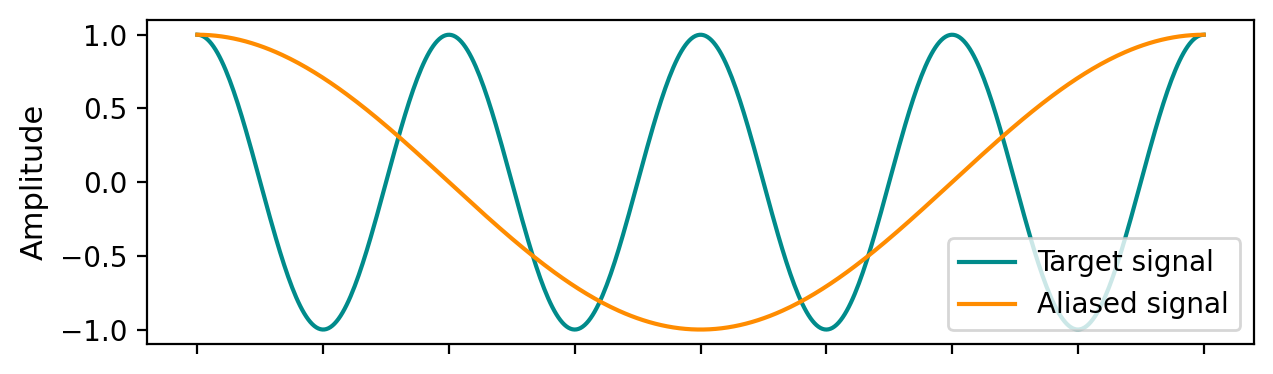

In [64]:
fig, ax = plt.subplots(1, 1, figsize=(6.5, 2), sharex=True)
ax.plot(t_target, y_target, c='darkcyan', label='Target signal')
ax.set(ylabel='Amplitude',xticklabels=[])

t_aliased = np.linspace(0, 2, 500)  # 2 seconds, 500 samples
y_aliased = np.cos(2 * np.pi * 0.5 * t_aliased)
ax.plot(t_aliased, y_aliased, c='darkorange', label='Aliased signal')

# # Find where y1 and y2 cross each other
# crossings = np.where(np.diff(np.sign(y1 - y2)))[0]

# # Interpolate to get more accurate crossing times
# cross_t = t1[crossings] - (y1[crossings] - y2[crossings]) * (t1[1] - t1[0]) / (y1[crossings+1] - y1[crossings] - (y2[crossings+1] - y2[crossings]))
# cross_y = y1[crossings] - (y1[crossings] - y2[crossings]) * (y1[crossings+1] - y1[crossings]) / ((y1[crossings+1] - y1[crossings]) - (y2[crossings+1] - y2[crossings]))

# ax.plot(cross_t, cross_y, 'o',color='darkorange')

ax.legend(loc='lower right')
fig.tight_layout()
fig.show()
plt.savefig('aliased_signal_example.png',dpi=300, bbox_inches='tight',pad_inches=0.1)

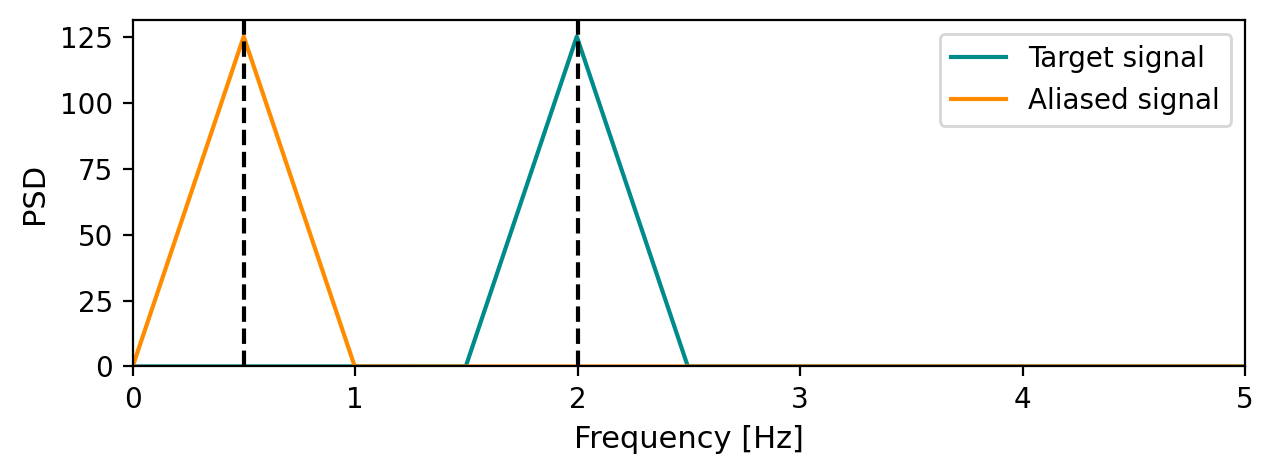

In [134]:
# Compute the Power Spectral Density (PSD) using FFT for y1 and y2
dt_target = t_target[1] - t_target[0]  # Sampling interval
dt_aliased = t_aliased[1] - t_aliased[0]  # Sampling interval for aliased signal
fs_target = 1 / dt_target         # Sampling frequency
fs_aliased = 1/0.8    # Sampling frequency for aliased signal

freqs_target = np.fft.rfftfreq(len(y_target), d=dt_target)
freqs_aliased = np.fft.rfftfreq(len(y_aliased), d=dt_aliased)
psd_target = np.abs(np.fft.rfft(y_target))**2 / len(y_target)
psd_aliased = np.abs(np.fft.rfft(y_aliased))**2 / len(y_aliased)

fig, ax = plt.subplots(figsize=(6.5, 2.5))
ax.plot(freqs_target, psd_target, color='darkcyan',label='Target signal')
ax.plot(freqs_aliased, psd_aliased, color='darkorange',label='Aliased signal')
ax.set(xlabel='Frequency [Hz]', ylabel='PSD', xlim=(0,5),ylim=(0,None))
ax.axvline(2, color='k', linestyle='--')
ax.axvline(0.5, color='k', linestyle='--')
ax.legend()
fig.tight_layout()
plt.savefig('psd_aliased_signal_example.png', dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show()

# Windowing

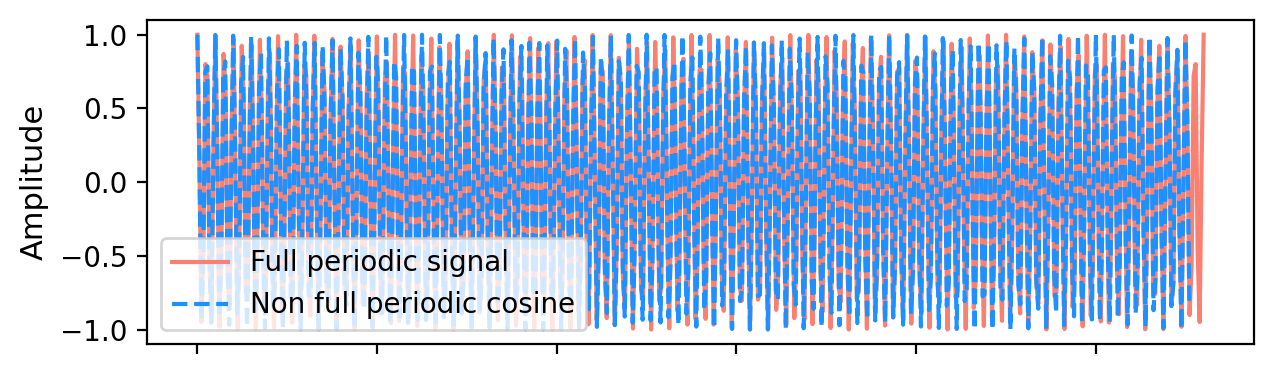

In [135]:
t_non_periodic = np.linspace(0, 27.6, 500)  # 2 seconds, 500 samples
y_non_periodic = np.cos(2 * np.pi * 4 * t_non_periodic)

t_full_periodic = np.linspace(0, 28, 500)  # 2 seconds, 500 samples
y_full_periodic = np.cos(2 * np.pi * 4 * t_full_periodic)

fig, ax = plt.subplots(figsize=(6.5, 2))
ax.plot(t_full_periodic, y_full_periodic,color='salmon',label='Full periodic signal')
ax.plot(t_non_periodic, y_non_periodic, ls = '--', color='dodgerblue',label='Non full periodic cosine')
ax.set(ylabel='Amplitude',xticklabels=[])
ax.legend(loc='lower left')
fig.tight_layout()
plt.savefig('non_full_periodic_signal.png', dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show()

In [225]:
def psd(signal,dt):
    """Compute the Power Spectral Density (PSD) using FFT."""
    n = len(signal)
    freqs = np.fft.rfftfreq(n, d=dt)
    psd_values = np.abs(np.fft.rfft(signal))**2 / (n/ dt)
    return freqs, psd_values

In [226]:
dt_non_periodic = t_non_periodic[1] - t_non_periodic[0]
dt_full_periodic = t_full_periodic[1] - t_full_periodic[0]
freqs_full_periodic, psd_y_full_periodic = psd(y_full_periodic, dt_full_periodic)
freqs_non_periodic, psd_y_non_periodic = psd(y_non_periodic, dt_non_periodic)

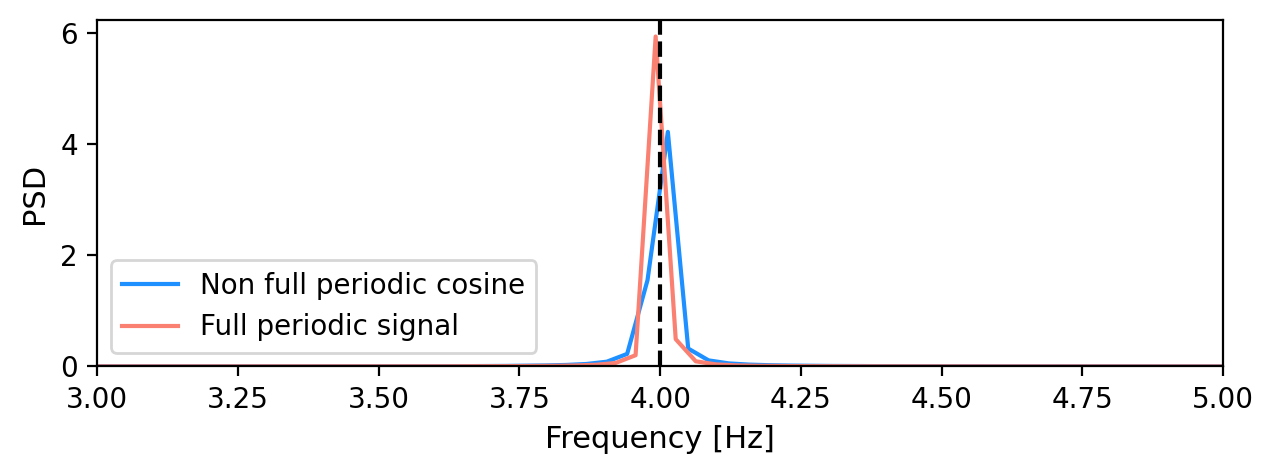

In [227]:
fig, ax = plt.subplots(figsize=(6.5, 2.5))
ax.plot(freqs_non_periodic, psd_y_non_periodic,color='dodgerblue',label='Non full periodic cosine')
ax.plot(freqs_full_periodic, psd_y_full_periodic, color='salmon',label='Full periodic signal')
ax.set(xlabel='Frequency [Hz]', ylabel='PSD', xlim=(3,5),ylim=(0,None))
ax.axvline(4, color='k', linestyle='--')
ax.legend(loc='lower left')
fig.tight_layout()
plt.savefig('psd_non_periodic_signal.png', dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show()

## Window types

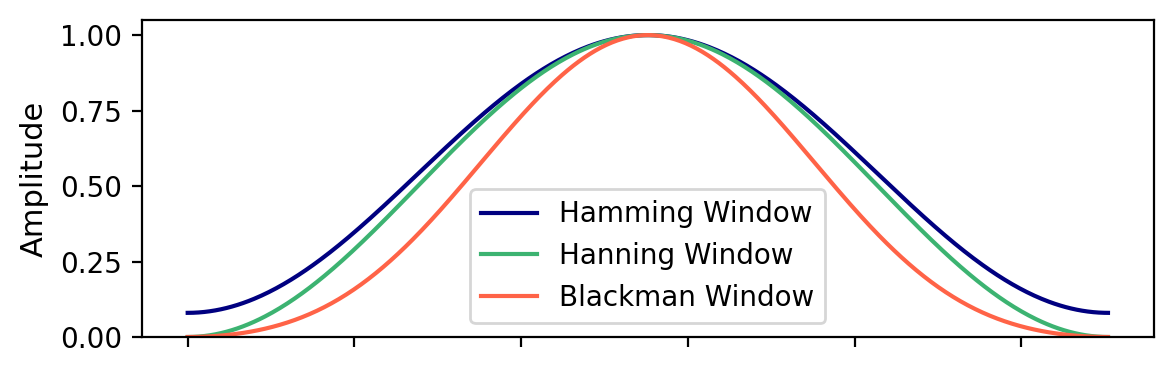

In [228]:
# Plot a Hanning window with the same length as t1
hamming_window = np.hamming(len(t_non_periodic))
hanning_window = np.hanning(len(t_non_periodic))
blackman_window = np.blackman(len(t_non_periodic))

fig, ax = plt.subplots(figsize=(6, 2))
ax.plot(t_non_periodic, hamming_window, label='Hamming Window', color='navy')
ax.plot(t_non_periodic, hanning_window, label='Hanning Window', color='mediumseagreen')
ax.plot(t_non_periodic, blackman_window, label='Blackman Window', color='tomato')
ax.set(ylabel='Amplitude',ylim=(0,None),xticklabels=[])
ax.legend()
fig.tight_layout()
plt.savefig('window_types.png', dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show()

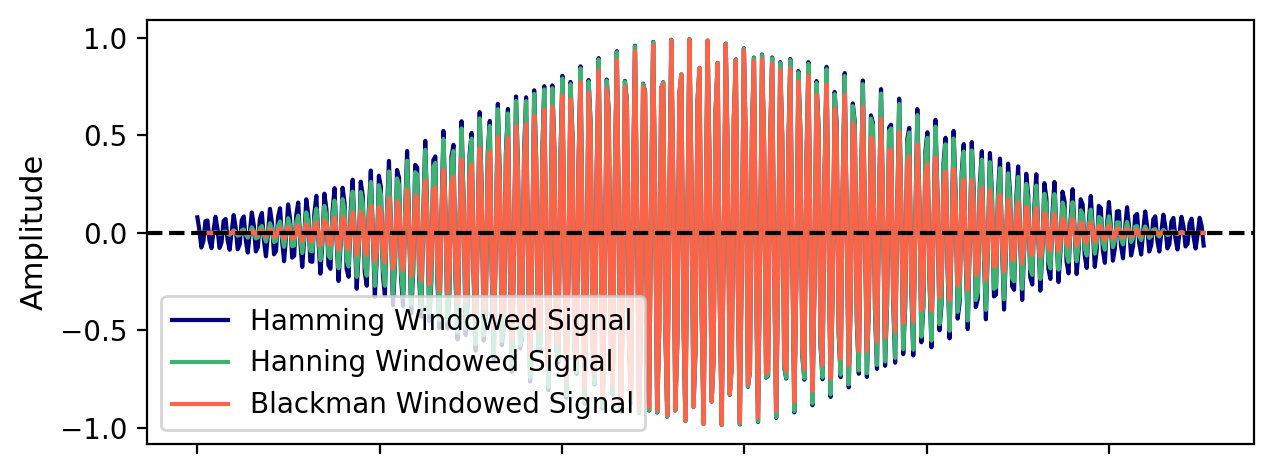

In [229]:
y_non_periodic_hamming_windowed = y_non_periodic * hamming_window
y_non_periodic_hanning_windowed = y_non_periodic * hanning_window
y_non_periodic_blackman_windowed = y_non_periodic * blackman_window

fig,ax = plt.subplots(figsize=(6.5, 2.5))
ax.plot(t_non_periodic, y_non_periodic_hamming_windowed, label='Hamming Windowed Signal', color='navy')
ax.plot(t_non_periodic, y_non_periodic_hanning_windowed, label='Hanning Windowed Signal', color='mediumseagreen')
ax.plot(t_non_periodic, y_non_periodic_blackman_windowed, label='Blackman Windowed Signal', color='tomato')
ax.set(ylabel='Amplitude',xticklabels=[])
ax.axhline(0, color='k', linestyle='--')
ax.legend(loc='lower left')
fig.tight_layout()
plt.savefig('windowed_signals.png', dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show()

In [230]:
freqs_hamming, psd_hamming = psd(y_non_periodic_hamming_windowed, dt_non_periodic)
freqs_hanning, psd_hanning = psd(y_non_periodic_hanning_windowed, dt_non_periodic)
freqs_blackman, psd_blackman = psd(y_non_periodic_blackman_windowed, dt_non_periodic)

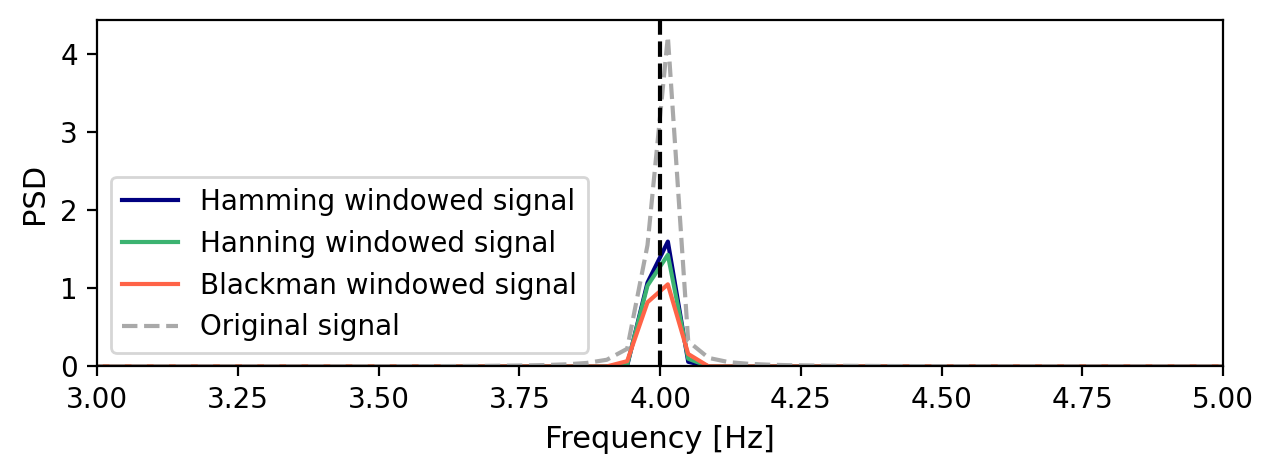

In [232]:
fig, ax = plt.subplots(figsize=(6.5, 2.5))
ax.plot(freqs_hamming, psd_hamming, color='navy', label='Hamming windowed signal')
ax.plot(freqs_hanning, psd_hanning, color='mediumseagreen', label='Hanning windowed signal')
ax.plot(freqs_blackman, psd_blackman, color='tomato', label='Blackman windowed signal')
ax.plot(freqs_non_periodic, psd_y_non_periodic, color='darkgray', label='Original signal', linestyle='--')
ax.set(xlabel='Frequency [Hz]', ylabel='PSD', xlim=(3,5),ylim=(0,None))
ax.axvline(4, color='k', linestyle='--')
ax.legend(loc='lower left')
fig.tight_layout()
plt.savefig('psd_windowed_signal.png', dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show()

# Non-stationary signal

In [265]:
# Parameters
fs = 1000  # Sampling frequency
T = 5      # Total time in seconds
t = np.linspace(0, T, int(T * fs), endpoint=False)

# Non-stationary signal: chirp + amplitude modulation
f0 = 2     # Start frequency
f1 = 10    # End frequency
chirp = np.sin(2 * np.pi * ((f1 - f0) / (2 * T) * t**2 + f0 * t))
amplitude = 1 + 0.5 * np.sin(2 * np.pi * 0.2 * t)  # Slow amplitude modulation

x = amplitude * chirp

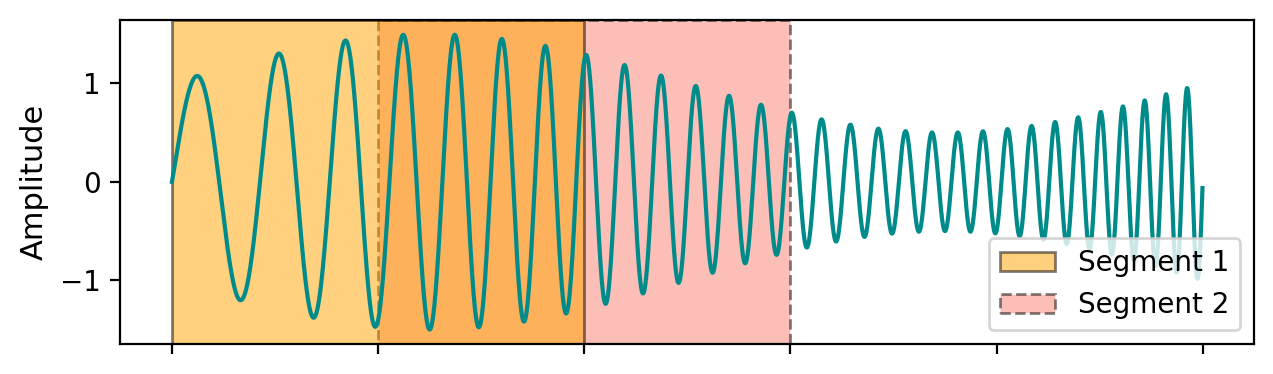

In [266]:
fig,ax = plt.subplots(figsize=(6.5, 2))
ax.plot(t, x, color='darkcyan')
ax.set(ylabel='Amplitude',xticklabels=[])

ax.axvspan(t[0], t[2000], facecolor='orange',alpha=0.5,edgecolor='k', linewidth=1, label='Segment 1',zorder=1)
ax.axvspan(t[1000], t[3000], facecolor='salmon',alpha=0.5,edgecolor='k',ls='--',linewidth=1, label='Segment 2',zorder=0)
ax.legend(loc='lower right')
fig.tight_layout()
plt.savefig('non_stationary_signal.png', dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show()


In [267]:
freqs_non_stationary, psd_non_stationary = psd(x, 1/fs)

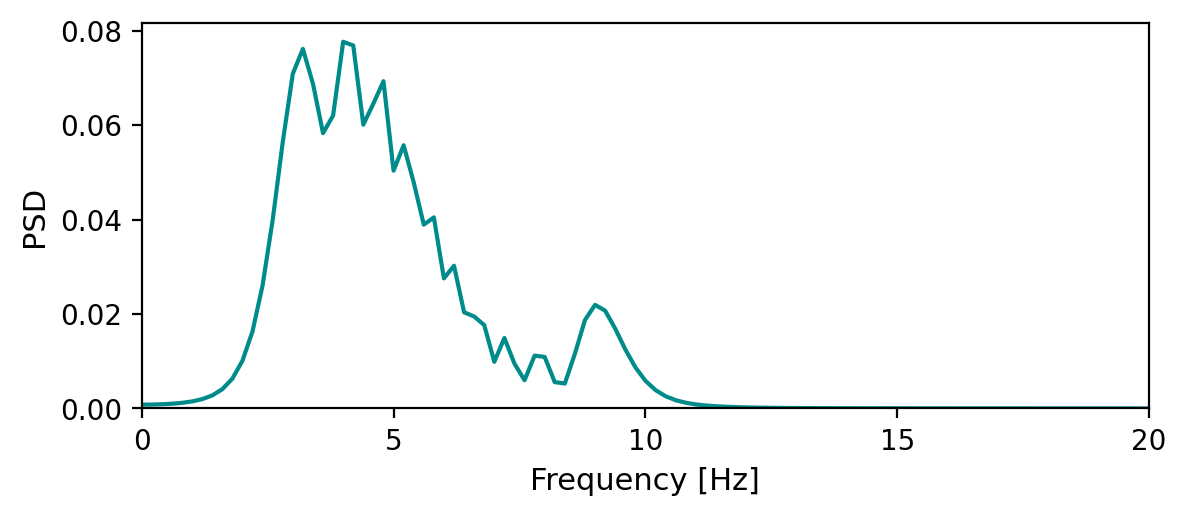

In [268]:
fig, ax = plt.subplots(figsize=(6.5, 2.5))
ax.plot(freqs_non_stationary, psd_non_stationary, color='darkcyan', label='Non-stationary signal')
ax.set(xlabel='Frequency [Hz]', ylabel='PSD', xlim=(0, 20), ylim=(0, None),xticks=np.arange(0, 21, 5))
plt.savefig('psd_non_stationary_signal.png', dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show()

# Sliding windowing

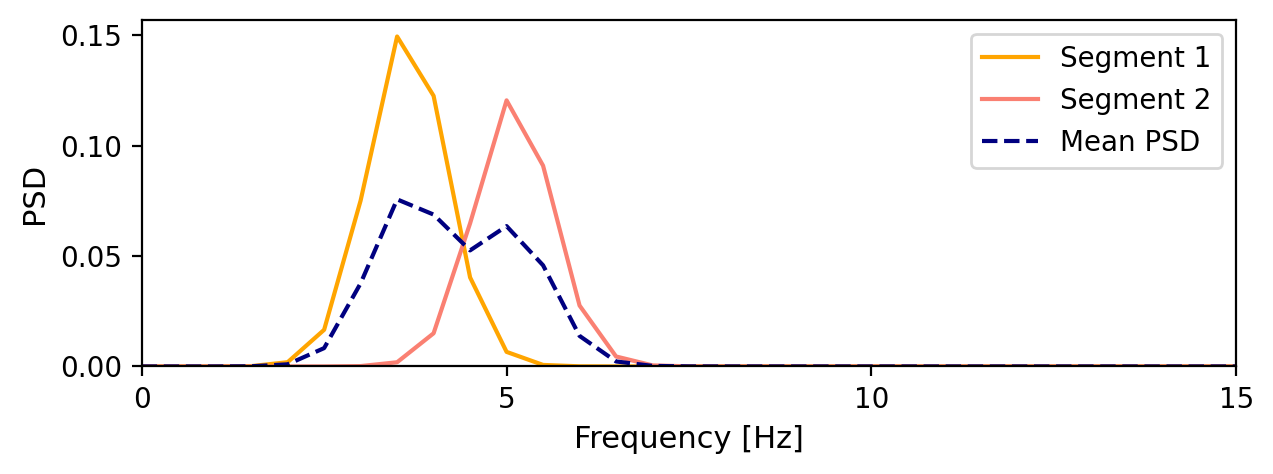

In [269]:
first_segment = x[:2000]
second_segment = x[1000:3000]

freqs_first_segment, psd_first_segment = psd(first_segment*np.hamming(len(first_segment)), 1/fs)
freqs_second_segment, psd_second_segment = psd(second_segment*np.hamming(len(second_segment)), 1/fs)

mean_psd = (psd_first_segment + psd_second_segment) / 2

fig, ax = plt.subplots(figsize=(6.5, 2.5))
ax.plot(freqs_first_segment, psd_first_segment, color='orange', label='Segment 1')
ax.plot(freqs_second_segment, psd_second_segment, color='salmon', label='Segment 2')
ax.plot(freqs_first_segment, mean_psd, color='navy', label='Mean PSD', linestyle='--')
ax.set(xlabel='Frequency [Hz]', ylabel='PSD', xlim=(0, 15), ylim=(0, None), xticks=np.arange(0, 16, 5))
ax.legend()
fig.tight_layout()
plt.savefig('psd_segments_mean.png', dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show()

# Welch method

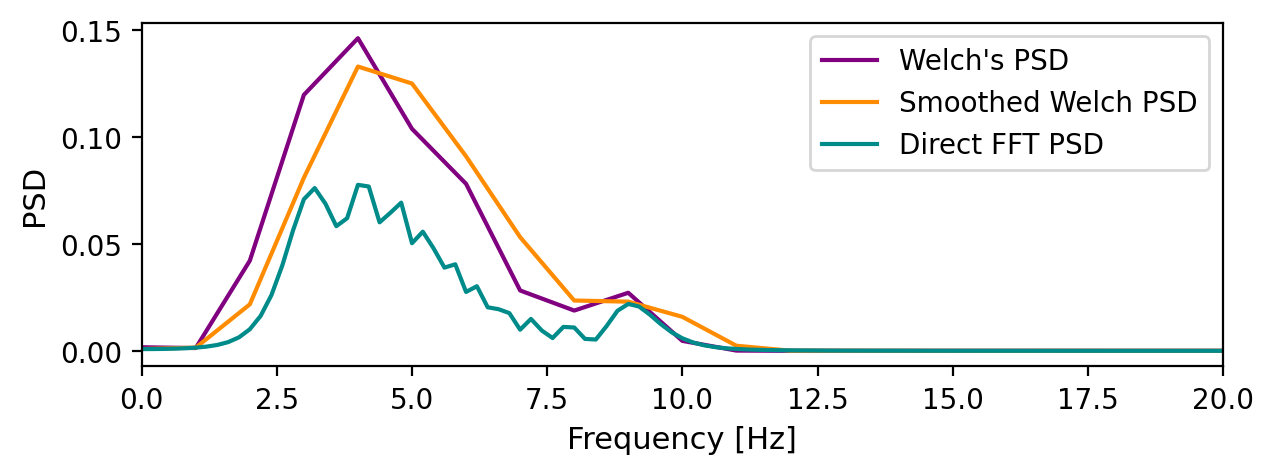

In [274]:
from scipy.signal import welch

f_welch, Pxx_welch = welch(x, fs=fs, nperseg=1000,noverlap=50,window='hamming') 

smoothing_bins = 2
kernel = np.ones(smoothing_bins) / smoothing_bins
psd_smoothed = np.convolve(Pxx_welch, kernel, mode='same')


fig, ax = plt.subplots(figsize=(6.5, 2.5))
ax.plot(f_welch, Pxx_welch, color='purple', label="Welch's PSD")
ax.plot(f_welch, psd_smoothed, color='darkorange', label='Smoothed Welch PSD')
ax.plot(freqs_non_stationary, psd_non_stationary, color='darkcyan', label='Direct FFT PSD')
ax.set(xlabel='Frequency [Hz]', ylabel='PSD', xlim=(0, 20))
ax.legend()
fig.tight_layout()
fig.savefig('welch_and_fft.png', dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show()
